# IMPORTING LIBARARIES

In [33]:
#  Data Preparation Libraries
import pandas as pd               # For data loading and manipulation (CSV, DataFrame)
import numpy as np                # For numerical operations and arrays
import re                         # For regular expressions (text cleaning)
import string                     # For text cleaning (punctuation removal)
import warnings
warnings.filterwarnings('ignore')

# Text Preprocessing and Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # For text vectorization
from sklearn.preprocessing import LabelEncoder, OneHotEncoder                 # For encoding categorical variables
from sklearn.model_selection import train_test_split                          # For splitting data into train/test
from sklearn.impute import SimpleImputer                                      # For handling missing values
from sklearn.utils import shuffle   
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve


# Natural Language Processing (for advanced text cleaning)
import nltk                             # Natural Language Toolkit (tokenization, stopwords)
from nltk.corpus import stopwords       # For removing stopwords
from nltk.stem import PorterStemmer     # For stemming words
from nltk.tokenize import word_tokenize # For tokenization


# Evaluation and Visualization 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import matplotlib.pyplot as plt         # For plotting loss curves, confusion matrix, etc.
import seaborn as sns                   # For better visualizations

print("✅ All libraries imported successfully!")
print("📊 Ready to work with the real Fake Job Postings dataset!")

✅ All libraries imported successfully!
📊 Ready to work with the real Fake Job Postings dataset!


# LOADING & EXPLORING THE DATASET 

In [36]:
def load_dataset(file_path='fake_job_postings.csv'): 
    """
    Load and analyze the fake job postings dataset.
    
    Parameters:
    -----------
    file_path : str, default='fake_job_postings.csv'
        Path to the CSV file containing the dataset
        
    Returns:
    --------
    pandas.DataFrame or None
        The loaded dataset if successful, None otherwise
    """
    try:
        # Load the dataset from CSV file
        df = pd.read_csv(file_path)
        print("✅ Real dataset loaded successfully!")
        
        # Display basic dataset information
        print(f"📊 Dataset shape: {df.shape}")
        
        # List all columns in the dataset
        print(f"\n📋 All columns in the dataset:")
        for i, col in enumerate(df.columns, 1):
            print(f"{i:2d}.{col}")

        # Analyze target variable distribution
        print(f"\n🎯 Target variable distribution:")
        if 'fraudulent' in df.columns:
            target_dist = df['fraudulent'].value_counts()
        print(f"  Real Jobs(0): {target_dist[0]:,} ({target_dist[0]/len(df)*100:.1f}%)")
        print(f"  Fake Jobs(1): {target_dist[1]:,} ({target_dist[1]/len(df)*100:.1f}%)")

        # Analyze missing values in the dataset
        print(f"\n❓ Missing values analysis: ")
        missing_values = df.isnull().sum()
        missing_cols = missing_values[missing_values > 0]
        if len(missing_cols) > 0:
            for col in missing_cols.index:
                print(f"   {col}: {missing_cols[col]:,} ({missing_cols[col]/len(df)*100:.1f}%)")
        else:
            print(f"no missing values in columns")
    
    except FileNotFoundError:
        # Handle case when the dataset file is not found
        print("❌ Error: Dataset file not found!")
        print("📥 Please download the dataset from:")
        print("   https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction")
        print("   Save it as 'fake_job_postings.csv' in your working directory")
        return None
        
    except Exception as e:
        # Handle any other exceptions that might occur
        print(f"❌ Error loading dataset: {str(e)}")
        return None

df = load_dataset()

✅ Real dataset loaded successfully!
📊 Dataset shape: (17880, 18)

📋 All columns in the dataset:
 1.job_id
 2.title
 3.location
 4.department
 5.salary_range
 6.company_profile
 7.description
 8.requirements
 9.benefits
10.telecommuting
11.has_company_logo
12.has_questions
13.employment_type
14.required_experience
15.required_education
16.industry
17.function
18.fraudulent

🎯 Target variable distribution:
  Real Jobs(0): 17,014 (95.2%)
  Fake Jobs(1): 866 (4.8%)

❓ Missing values analysis: 
   location: 346 (1.9%)
   department: 11,547 (64.6%)
   salary_range: 15,012 (84.0%)
   company_profile: 3,308 (18.5%)
   description: 1 (0.0%)
   requirements: 2,696 (15.1%)
   benefits: 7,212 (40.3%)
   employment_type: 3,471 (19.4%)
   required_experience: 7,050 (39.4%)
   required_education: 8,105 (45.3%)
   industry: 4,903 (27.4%)
   function: 6,455 (36.1%)


In [38]:
df = pd.read_csv('fake_job_postings.csv')
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Comprehensive Data Exploration


📝 Analyzing feature distribution...




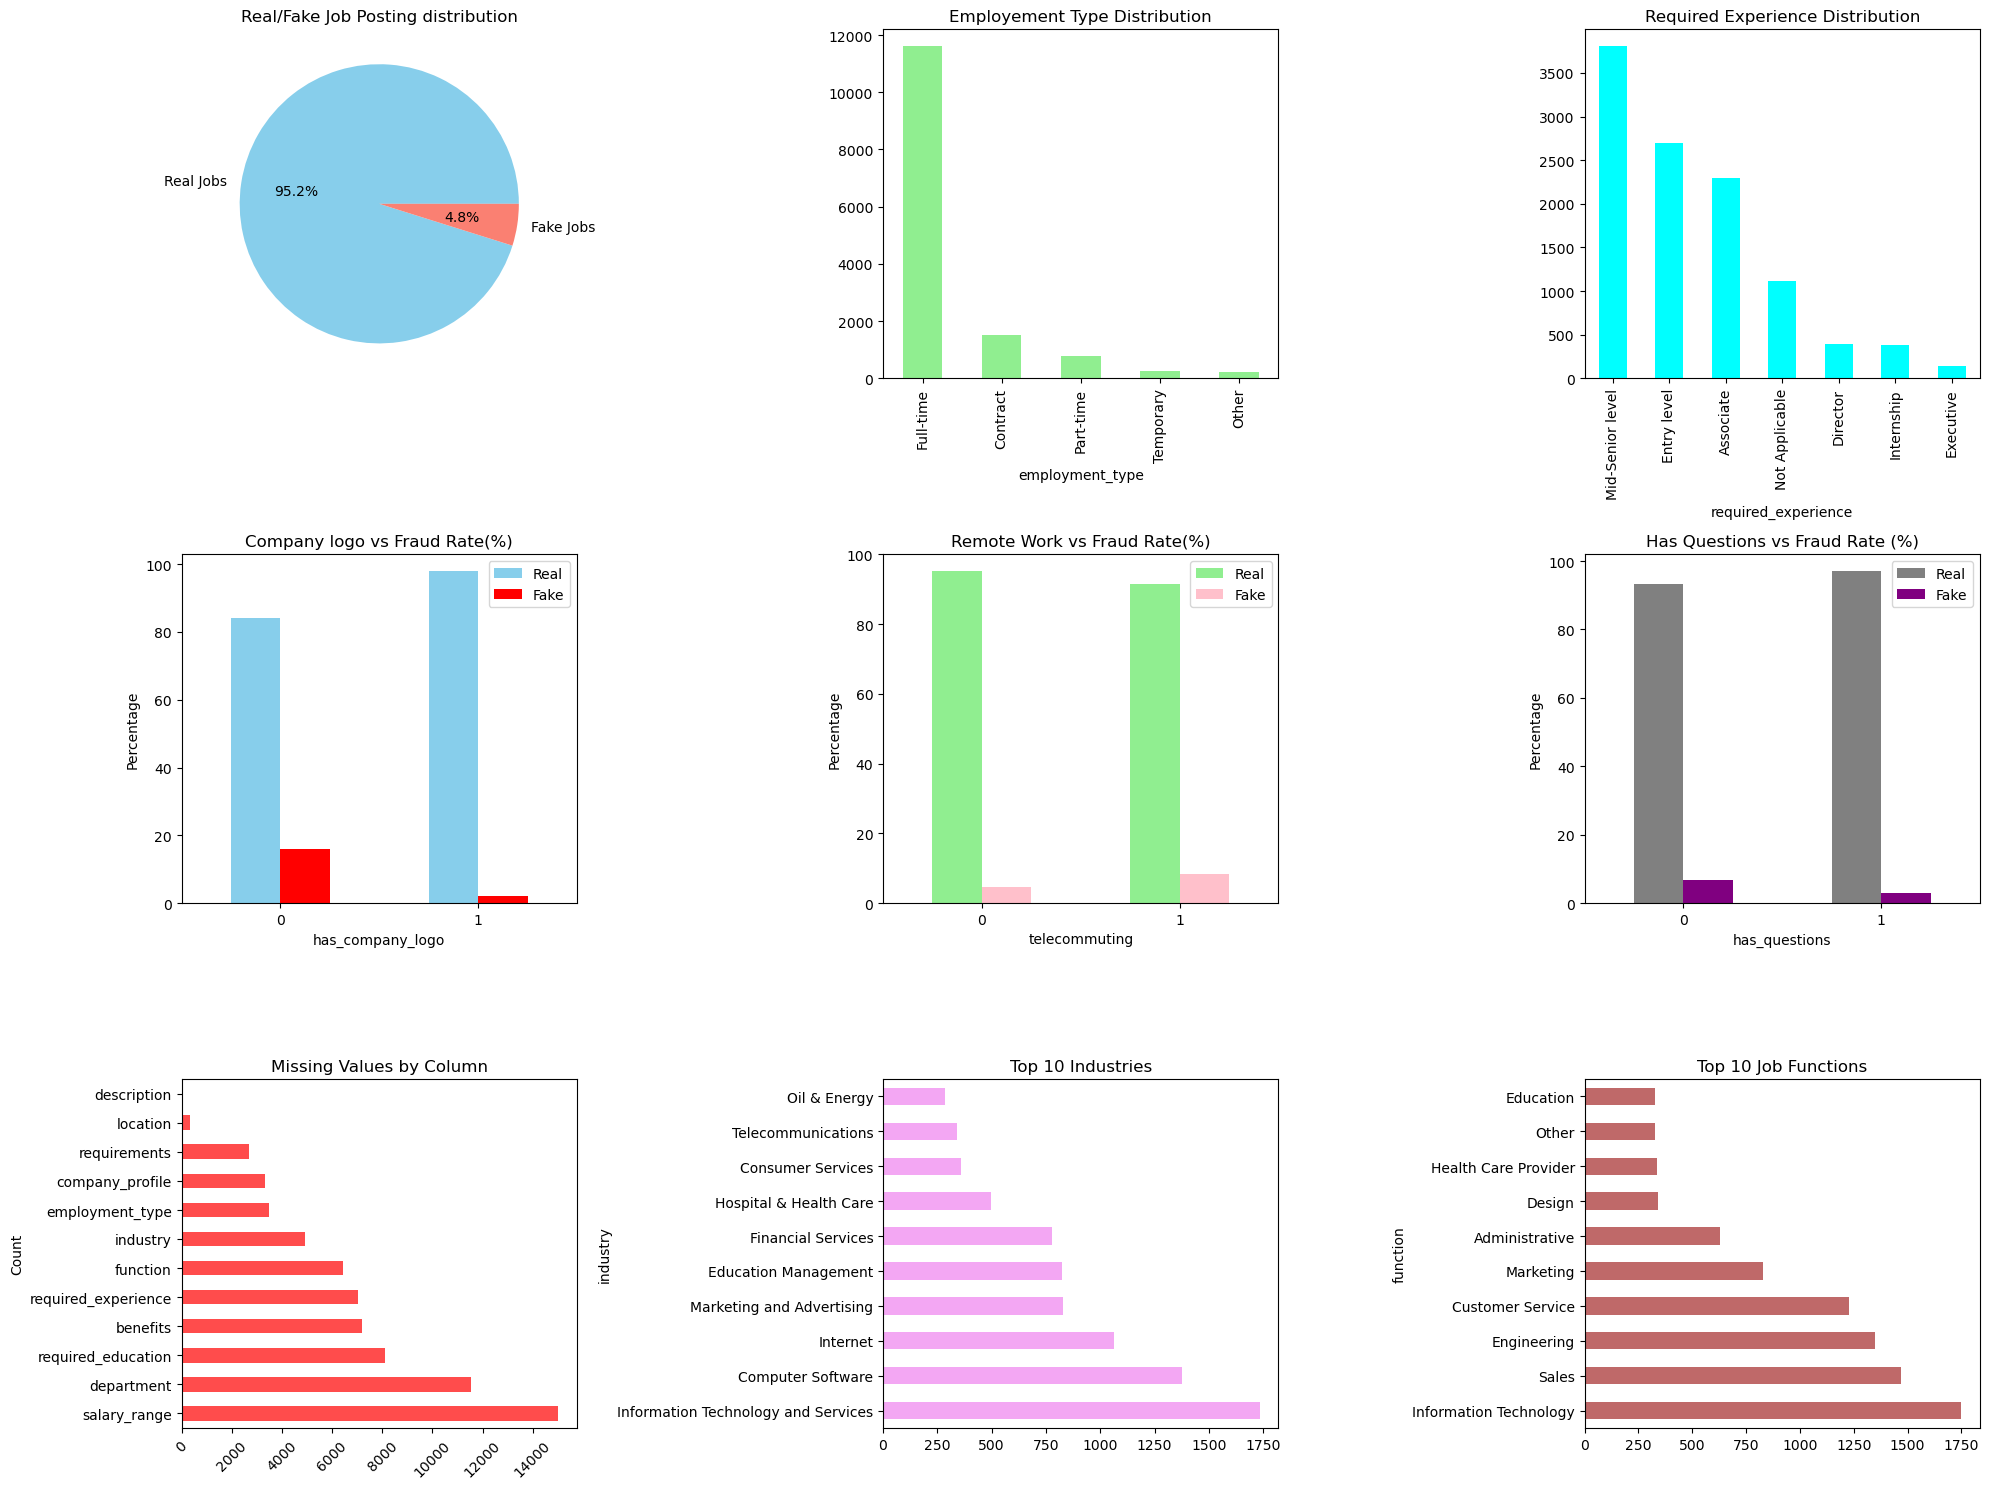



📝 Analyzing text features...



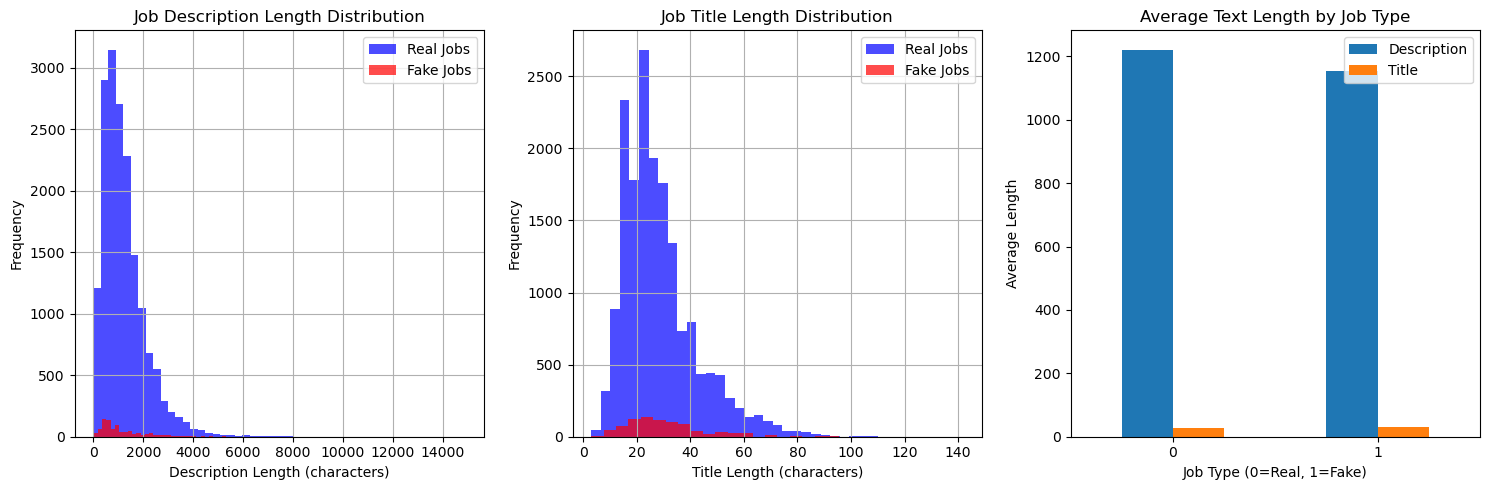

In [41]:
print("\n📝 Analyzing feature distribution...\n\n")
# Create a 3x3 grid of subplots with a figure size of 20x15 inches
fig, axes= plt.subplots(3,3, figsize=(20,15))
# Add space between subplots for better readability
plt.subplots_adjust(wspace=1, hspace=1)

# 1. Target Distribution - Visualize the balance between real and fake job postings
target_counts=df['fraudulent'].value_counts()
# Create a pie chart showing the proportion of real vs fake jobs
axes[0,0].pie(target_counts.values, labels=['Real Jobs','Fake Jobs'], autopct='%1.1f%%', colors=['skyblue','salmon'])
axes[0,0].set_title('Real/Fake Job Posting distribution')

# 2. Employment Type Distribution - Analyze different employment types in the dataset
emp_counts=df['employment_type'].value_counts()
# Create a bar chart showing the frequency of each employment type
emp_counts.plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Employement Type Distribution')

# 3. Required Experience Distribution - Visualize experience requirements
exp_counts=df['required_experience'].value_counts()
# Create a bar chart showing the frequency of each experience level
exp_counts.plot(kind='bar', ax=axes[0,2], color='cyan')
axes[0,2].set_title('Required Experience Distribution')

# 4. Company Logo vs Fraud - Analyze if having a company logo correlates with legitimacy
logo_fraud=pd.crosstab(df['has_company_logo'], df['fraudulent'],normalize='index')*100
# Create a bar chart showing the percentage of real vs fake jobs based on logo presence
logo_fraud.plot(kind='bar', ax=axes[1,0], color=['skyblue','red'])
axes[1,0].set_title('Company logo vs Fraud Rate(%)')
axes[1,0].set_ylabel('Percentage')
axes[1,0].tick_params(axis='x', rotation=0)
axes[1,0].legend(['Real','Fake'])

# 5. Telecommuting vs Fraud - Analyze if remote work options correlate with legitimacy
telecom_fraud=pd.crosstab(df['telecommuting'],df['fraudulent'],normalize='index')*100
# Create a bar chart showing the percentage of real vs fake jobs based on remote work option
telecom_fraud.plot(kind='bar', ax=axes[1,1], color=['lightgreen','pink'])
axes[1,1].set_title('Remote Work vs Fraud Rate(%)')
axes[1,1].set_ylabel('Percentage')
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].legend(['Real','Fake'])

# 6. Questions vs Fraud - Analyze if having screening questions correlates with legitimacy
questions_fraud = pd.crosstab(df['has_questions'], df['fraudulent'], normalize='index') * 100
# Create a bar chart showing the percentage of real vs fake jobs based on presence of questions
questions_fraud.plot(kind='bar', ax=axes[1,2], color=['grey', 'purple'])
axes[1,2].set_title('Has Questions vs Fraud Rate (%)')
axes[1,2].set_ylabel('Percentage')
axes[1,2].tick_params(axis='x', rotation=0)
axes[1,2].legend(['Real', 'Fake'])

#7. Missing values dsitribution
missing_data=df.isnull().sum()
missing_df=missing_data[missing_data>0].sort_values(ascending=False)
missing_df.plot(kind='barh', ax=axes[2,0], color='red', alpha=0.7)
axes[2,0].set_title('Missing Values by Column')
axes[2,0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees for better readability
axes[2,0].set_ylabel('Count')  # Set y-axis label

#8. Industry distribution (top 10)
industry_counts=df['industry'].value_counts().head(10)  # Get counts of top 10 industries
industry_counts.plot(kind='barh', ax=axes[2,1], color='violet', alpha=0.7)  # Create horizontal bar chart with violet color
axes[2,1].set_title('Top 10 Industries')  # Set subplot title

# 9. Function distribution (top 10)
function_counts = df['function'].value_counts().head(10)  # Get counts of top 10 job functions
function_counts.plot(kind='barh', ax=axes[2,2], color='brown', alpha=0.7)  # Create horizontal bar chart with brown color
axes[2,2].set_title('Top 10 Job Functions')  # Set subplot title
    
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display the entire figure with all subplots

# TEXT LENGTH ANALYSIS
print("\n\n📝 Analyzing text features...\n")  # Print section header with emoji
# Calculate text lengths for different fields
df['description_length'] = df['description'].fillna('').astype(str).apply(len)  # Calculate length of job descriptions
df['title_length'] = df['title'].fillna('').astype(str).apply(len)  # Calculate length of job titles
df['requirements_length'] = df['requirements'].fillna('').astype(str).apply(len)  # Calculate length of job requirements
plt.figure(figsize=(15, 5))  # Create a new figure with specified size

#1. Description length
plt.subplot(1, 3, 1)  # Create first subplot in a 1x3 grid
# Create histograms comparing description lengths between real and fraudulent jobs
df[df['fraudulent'] == 0]['description_length'].hist(bins=50, alpha=0.7, label='Real Jobs', color='blue')
df[df['fraudulent'] == 1]['description_length'].hist(bins=50, alpha=0.7, label='Fake Jobs', color='red')
plt.xlabel('Description Length (characters)')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Job Description Length Distribution')  # Set subplot title
plt.legend()  # Add legend to distinguish between real and fake jobs

#2. Title length
plt.subplot(1, 3, 2)  # Create second subplot in a 1x3 grid
# Create histograms comparing title lengths between real and fraudulent jobs
df[df['fraudulent'] == 0]['title_length'].hist(bins=30, alpha=0.7, label='Real Jobs', color='blue')
df[df['fraudulent'] == 1]['title_length'].hist(bins=30, alpha=0.7, label='Fake Jobs', color='red')
plt.xlabel('Title Length (characters)')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Job Title Length Distribution')  # Set subplot title
plt.legend()  # Add legend to distinguish between real and fake jobs

#3. Text statistics comparison
plt.subplot(1, 3, 3)  # Create third subplot in a 1x3 grid
# Calculate and plot average text lengths grouped by fraudulent status
text_stats = df.groupby('fraudulent')[['description_length', 'title_length']].mean()
text_stats.plot(kind='bar', ax=plt.gca())
plt.title('Average Text Length by Job Type')  # Set subplot title
plt.xlabel('Job Type (0=Real, 1=Fake)')  # Set x-axis label
plt.ylabel('Average Length')  # Set y-axis label
plt.xticks(rotation=0)  # Set x-tick rotation to 0 degrees
plt.legend(['Description', 'Title'])  # Add legend to identify the bars
        
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display the figure with all subplots

# DATA PREPROCESSOR FOR THE DATASET

In [44]:
class ImbalanceAwarePreprocessor:
    """Advanced preprocessor with class imbalance handling capabilities"""
    
    def __init__(self, handle_imbalance='smote'):
        """
        Initialize preprocessor with imbalance handling options
        
        Parameters:
        handle_imbalance: 'smote', 'oversample', 'undersample', 'smote_tomek', 'class_weights', None
        """
        print("🔄 Initializing ImbalanceAwarePreprocessor...")
        
        self.handle_imbalance = handle_imbalance
        
        # Text vectorizer
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=2000,  # Increased for better representation
            stop_words='english',
            lowercase=True,
            ngram_range=(1, 2),  # Include bigrams
            min_df=2,  # Ignore rare terms
            max_df=0.95,  # Ignore too common terms
            sublinear_tf=True  # Apply sublinear tf scaling
        )
        
        # Other preprocessors
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.class_weights = None
        
        # Initialize sampling methods
        if handle_imbalance == 'smote':
            self.sampler = SMOTE(random_state=42, k_neighbors=3)
        elif handle_imbalance == 'oversample':
            self.sampler = RandomOverSampler(random_state=42)
        elif handle_imbalance == 'undersample':
            self.sampler = RandomUnderSampler(random_state=42)
        elif handle_imbalance == 'smote_tomek':
            self.sampler = SMOTETomek(random_state=42)
        else:
            self.sampler = None
        
        print(f"   Imbalance handling strategy: {handle_imbalance}")
        print("Complete: Preprocessor initialized!")
    
    def clean_text(self, text):
        """Enhanced text cleaning for job postings"""
        if pd.isna(text):
            return ""
        
        text = str(text).lower()
        
        # Remove URLs and emails
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\S+@\S+', '', text)
        
        # Remove phone numbers
        text = re.sub(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', '', text)
        
        # Remove special characters but keep spaces
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)
        
        # Remove extra whitespace
        text = ' '.join(text.split())
        
        return text
    
    def combine_text_features(self, df):
        """Combine all text features with weighted importance"""
        text_columns = ['title', 'description', 'company_profile', 'requirements', 'benefits']
        existing_text_cols = [col for col in text_columns if col in df.columns]
        
        print(f"   Processing text columns: {existing_text_cols}")
        
        combined_text = []
        for idx, row in df.iterrows():
            text_parts = []
            
            # Title gets higher weight (repeated 3 times)
            if 'title' in existing_text_cols:
                title_clean = self.clean_text(row['title'])
                if title_clean:
                    text_parts.extend([title_clean] * 3)
            
            # Description gets medium weight (repeated 2 times)
            if 'description' in existing_text_cols:
                desc_clean = self.clean_text(row['description'])
                if desc_clean:
                    text_parts.extend([desc_clean] * 2)
            
            # Other fields get normal weight
            for col in existing_text_cols:
                if col not in ['title', 'description']:
                    cleaned_text = self.clean_text(row[col])
                    if cleaned_text:
                        text_parts.append(cleaned_text)
            
            combined_text.append(' '.join(text_parts))
        
        return combined_text
    
    def encode_categorical_features(self, df):
        """Encode categorical features with handling for high cardinality"""
        possible_categorical = [
            'employment_type', 'required_experience', 'required_education',
            'industry', 'function', 'location', 'department'
        ]
        
        categorical_columns = [col for col in possible_categorical if col in df.columns]
        print(f"   Processing categorical columns: {categorical_columns}")
        
        encoded_features = []
        
        for col in categorical_columns:
            df_copy = df.copy()
            df_copy[col] = df_copy[col].fillna('Unknown')
            
            # Handle high cardinality columns
            if col in ['location', 'industry', 'function', 'department']:
                # Keep only top 30 categories, group rest as 'Other'
                top_categories = df_copy[col].value_counts().head(30).index
                df_copy[col] = df_copy[col].apply(lambda x: x if x in top_categories else 'Other')
            
            # Label encode
            if col not in self.label_encoders:
                self.label_encoders[col] = LabelEncoder()
                encoded = self.label_encoders[col].fit_transform(df_copy[col])
            else:
                encoded = self.label_encoders[col].transform(df_copy[col])
            
            encoded_features.append(encoded.reshape(-1, 1))
        
        if encoded_features:
            return np.hstack(encoded_features)
        else:
            return np.array([]).reshape(len(df), 0)
    
    def extract_numerical_features(self, df):
        """Extract and engineer numerical features"""
        numerical_features = []
        
        # Binary features
        binary_columns = ['has_company_logo', 'telecommuting', 'has_questions']
        existing_binary = [col for col in binary_columns if col in df.columns]
        print(f"   Processing binary columns: {existing_binary}")
        
        for col in existing_binary:
            values = df[col].fillna(0).astype(int).values.reshape(-1, 1)
            numerical_features.append(values)
        
        # Text-derived features
        if 'description' in df.columns:
            # Description metrics
            desc_length = df['description'].fillna('').astype(str).apply(len).values.reshape(-1, 1)
            word_count = df['description'].fillna('').astype(str).apply(lambda x: len(x.split())).values.reshape(-1, 1)
            exclamation_count = df['description'].fillna('').astype(str).apply(lambda x: x.count('!')).values.reshape(-1, 1)
            caps_ratio = df['description'].fillna('').astype(str).apply(
                lambda x: sum(1 for c in x if c.isupper()) / max(len(x), 1)
            ).values.reshape(-1, 1)
            
            numerical_features.extend([desc_length, word_count, exclamation_count, caps_ratio])
        
        if 'title' in df.columns:
            # Title metrics
            title_length = df['title'].fillna('').astype(str).apply(len).values.reshape(-1, 1)
            title_word_count = df['title'].fillna('').astype(str).apply(lambda x: len(x.split())).values.reshape(-1, 1)
            title_caps_ratio = df['title'].fillna('').astype(str).apply(
                lambda x: sum(1 for c in x if c.isupper()) / max(len(x), 1)
            ).values.reshape(-1, 1)
            
            numerical_features.extend([title_length, title_word_count, title_caps_ratio])
        
        # Additional engineered features
        if 'requirements' in df.columns:
            has_requirements = (df['requirements'].fillna('').astype(str).apply(len) > 0).astype(int).values.reshape(-1, 1)
            req_length = df['requirements'].fillna('').astype(str).apply(len).values.reshape(-1, 1)
            numerical_features.extend([has_requirements, req_length])
        
        if 'salary_range' in df.columns:
            has_salary = (~df['salary_range'].isna()).astype(int).values.reshape(-1, 1)
            numerical_features.append(has_salary)
        
        if 'company_profile' in df.columns:
            has_company_profile = (df['company_profile'].fillna('').astype(str).apply(len) > 0).astype(int).values.reshape(-1, 1)
            numerical_features.append(has_company_profile)
        
        if numerical_features:
            return np.hstack(numerical_features)
        else:
            return np.array([]).reshape(len(df), 0)
    
    def calculate_class_weights(self, y):
        """Calculate class weights for imbalanced data"""
        classes = np.unique(y)
        class_weights = compute_class_weight('balanced', classes=classes, y=y)
        self.class_weights = dict(zip(classes, class_weights))
        
        print(f"   Calculated class weights: {self.class_weights}")
        return self.class_weights
    
    def fit_transform(self, df, y=None):
        """Fit preprocessor and transform data with imbalance handling"""
        print("🔄 Starting preprocessing with class imbalance handling...")
        
        if y is None:
            y = df['fraudulent'].values
        
        # 1. Process text features
        print("📝 Processing text features...")
        combined_text = self.combine_text_features(df)
        text_features = self.tfidf_vectorizer.fit_transform(combined_text).toarray()
        print(f"   Text features shape: {text_features.shape}")
        
        # 2. Process categorical features
        print("🏷️  Processing categorical features...")
        categorical_features = self.encode_categorical_features(df)
        print(f"   Categorical features shape: {categorical_features.shape}")
        
        # 3. Process numerical features
        print("🔢 Processing numerical features...")
        numerical_features = self.extract_numerical_features(df)
        print(f"   Numerical features shape: {numerical_features.shape}")
        
        # 4. Combine all features
        print("🔗 Combining all features...")
        all_features = [text_features]
        
        if categorical_features.shape[1] > 0:
            all_features.append(categorical_features)
        
        if numerical_features.shape[1] > 0:
            all_features.append(numerical_features)
        
        final_features = np.hstack(all_features)
        print(f"   Combined features shape: {final_features.shape}")
        
        # 5. Scale features
        print("⚖️  Scaling features...")
        final_features = self.scaler.fit_transform(final_features)
        
        # 6. Handle class imbalance
        if self.handle_imbalance == 'class_weights':
            print("⚖️  Calculating class weights...")
            self.calculate_class_weights(y)
            X_balanced, y_balanced = final_features, y
        elif self.sampler is not None:
            print(f"🎯 Applying {self.handle_imbalance} sampling...")
            print(f"   Original distribution: {np.bincount(y)}")
            X_balanced, y_balanced = self.sampler.fit_resample(final_features, y)
            print(f"   Balanced distribution: {np.bincount(y_balanced)}")
        else:
            print("   No sampling applied")
            X_balanced, y_balanced = final_features, y
        
        print(f"✅ Complete: Preprocessing finished! Final shape: {X_balanced.shape}")
        return X_balanced, y_balanced
    
    def transform(self, df):
        """Transform new data using fitted preprocessor"""
        combined_text = self.combine_text_features(df)
        text_features = self.tfidf_vectorizer.transform(combined_text).toarray()
        
        categorical_features = self.encode_categorical_features(df)
        numerical_features = self.extract_numerical_features(df)
        
        all_features = [text_features]
        if categorical_features.shape[1] > 0:
            all_features.append(categorical_features)
        if numerical_features.shape[1] > 0:
            all_features.append(numerical_features)
        
        final_features = np.hstack(all_features)
        final_features = self.scaler.transform(final_features)
        
        return final_features

print("ImbalanceAwarePreprocessor class defined successfully!")


ImbalanceAwarePreprocessor class defined successfully!


# PREPROCESS REAL DATA

In [47]:
if df is not None:
    print("Preprocessing data with imbalance handling...")
    
    # Test different imbalance handling strategies
    strategies = ['smote', 'class_weights', 'oversample']
    
    print("🎯 Testing different imbalance handling strategies:")
    print("=" * 60)
    
    results = {}
    
    for strategy in strategies:
        print(f"\n🔄 Testing strategy: {strategy.upper()}")
        print("-" * 40)
        
        # Initialize preprocessor with current strategy
        preprocessor = ImbalanceAwarePreprocessor(handle_imbalance=strategy)
        
        # Preprocess data
        X_processed, y_processed = preprocessor.fit_transform(df)
        
        # Store results
        results[strategy] = {
            'preprocessor': preprocessor,
            'X': X_processed,
            'y': y_processed,
            'original_shape': X_processed.shape,
            'class_distribution': np.bincount(y_processed)
        }
        
        print(f"   Final shape: {X_processed.shape}")
        print(f"   Class distribution: {np.bincount(y_processed)}")
    
    # Choose the best strategy (SMOTE for demonstration)
    chosen_strategy = 'smote'
    print(f"\n✅ Using strategy: {chosen_strategy.upper()}")
    
    preprocessor = results[chosen_strategy]['preprocessor']
    X = results[chosen_strategy]['X']
    y = results[chosen_strategy]['y']
    
    print(f"\n📊 Final preprocessed data:")
    print(f"   Features: {X.shape[1]:,}")
    print(f"   Samples: {X.shape[0]:,}")
    print(f"   Class distribution: {np.bincount(y)}")
    print(f"   Feature value range: [{X.min():.4f}, {X.max():.4f}]")
    
    print("Data preprocessing finished!")
    
else:
    print("❌ Cannot proceed without dataset")


Preprocessing data with imbalance handling...
🎯 Testing different imbalance handling strategies:

🔄 Testing strategy: SMOTE
----------------------------------------
🔄 Initializing ImbalanceAwarePreprocessor...
   Imbalance handling strategy: smote
Complete: Preprocessor initialized!
🔄 Starting preprocessing with class imbalance handling...
📝 Processing text features...
   Processing text columns: ['title', 'description', 'company_profile', 'requirements', 'benefits']
   Text features shape: (17880, 2000)
🏷️  Processing categorical features...
   Processing categorical columns: ['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'location', 'department']
   Categorical features shape: (17880, 7)
🔢 Processing numerical features...
   Processing binary columns: ['has_company_logo', 'telecommuting', 'has_questions']
   Numerical features shape: (17880, 14)
🔗 Combining all features...
   Combined features shape: (17880, 2021)
⚖️  Scaling features...
🎯 Ap

  File "C:\Users\Narender\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Narender\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Narender\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Narender\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


   Balanced distribution: [17014 17014]
✅ Complete: Preprocessing finished! Final shape: (34028, 2021)
   Final shape: (34028, 2021)
   Class distribution: [17014 17014]

🔄 Testing strategy: CLASS_WEIGHTS
----------------------------------------
🔄 Initializing ImbalanceAwarePreprocessor...
   Imbalance handling strategy: class_weights
Complete: Preprocessor initialized!
🔄 Starting preprocessing with class imbalance handling...
📝 Processing text features...
   Processing text columns: ['title', 'description', 'company_profile', 'requirements', 'benefits']
   Text features shape: (17880, 2000)
🏷️  Processing categorical features...
   Processing categorical columns: ['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'location', 'department']
   Categorical features shape: (17880, 7)
🔢 Processing numerical features...
   Processing binary columns: ['has_company_logo', 'telecommuting', 'has_questions']
   Numerical features shape: (17880, 14)
🔗 Combini

# DEFINING THE NEURAL NETWORK

In [50]:
class ImbalanceAwareNeuralNetwork:
    """Neural network with class imbalance handling capabilities"""
    
    def __init__(self, input_size, hidden_sizes=[128,64], learning_rate=0.0001, 
                 dropout_rate=0.63, class_weights=None, focal_loss=False):
        """
        Initialize neural network with imbalance handling
        
        Parameters:
        input_size: number of input features
        hidden_sizes: list of hidden layer sizes
        learning_rate: learning rate for optimization
        dropout_rate: dropout probability for regularization
        class_weights: dictionary of class weights for weighted loss
        focal_loss: whether to use focal loss for imbalanced data
        """
        print("🔄 Initializing ImbalanceAwareNeuralNetwork...")
        
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.class_weights = class_weights
        self.focal_loss = focal_loss
        self.layers = []
        
        # Initialize weights and biases
        layer_sizes = [input_size] + hidden_sizes + [1]
        
        print(f"🧠 Neural Network Architecture:")
        print(f"   Layers: {layer_sizes}")
        print(f"   Learning rate: {self.learning_rate}")
        print(f"   Dropout rate: {self.dropout_rate}")
        print(f"   Class weights: {self.class_weights}")
        print(f"   Focal loss: {self.focal_loss}")
        
        for i in range(len(layer_sizes) - 1):
            # He initialization for ReLU layers
            if i < len(layer_sizes) - 2:
                weight = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            else:
                weight = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(1.0 / layer_sizes[i])
            
            bias = np.zeros((1, layer_sizes[i+1]))
            
            self.layers.append({
                'weight': weight,
                'bias': bias,
                'activation': None,
                'z': None,
                'dropout_mask': None
            })
            
            print(f"   Layer {i+1}: {layer_sizes[i]} → {layer_sizes[i+1]} neurons")
        
        print("✅ Complete: Neural Network initialized!")
    
    def sigmoid(self, z):
        """Sigmoid activation with numerical stability"""
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def leaky_relu(self, z, alpha=0.01):
        """Leaky ReLU activation"""
        return np.where(z > 0, z, alpha * z)
    
    def leaky_relu_derivative(self, z, alpha=0.01):
        """Derivative of Leaky ReLU"""
        return np.where(z > 0, 1, alpha)
    
    def apply_dropout(self, x, training=True):
        """Apply dropout regularization"""
        if training and self.dropout_rate > 0:
            mask = np.random.binomial(1, 1 - self.dropout_rate, x.shape) / (1 - self.dropout_rate)
            return x * mask, mask
        else:
            return x, None
    
    def forward_propagation(self, X, training=True):
        """Forward propagation with dropout"""
        current_input = X
        
        for i, layer in enumerate(self.layers):
            # Linear transformation
            z = np.dot(current_input, layer['weight']) + layer['bias']
            layer['z'] = z
            
            if i == len(self.layers) - 1:  # Output layer
                activation = self.sigmoid(z)
            else:  # Hidden layers
                activation = self.leaky_relu(z)
                if training:
                    activation, dropout_mask = self.apply_dropout(activation, training)
                    layer['dropout_mask'] = dropout_mask
            
            layer['activation'] = activation
            current_input = activation
        
        return current_input
    
    def compute_weighted_loss(self, y_true, y_pred):
        """Compute weighted binary cross-entropy loss"""
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        
        if self.focal_loss:
            # Focal loss for hard examples
            alpha = 0.25
            gamma = 2.0
            
            ce_loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
            p_t = np.where(y_true == 1, y_pred, 1 - y_pred)
            focal_weight = alpha * (1 - p_t) ** gamma
            focal_loss = focal_weight * ce_loss
            
            loss = np.mean(focal_loss)
        else:
            # Standard weighted cross-entropy
            if self.class_weights is not None:
                # Apply class weights
                weights = np.where(y_true == 1, self.class_weights[1], self.class_weights[0])
                ce_loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
                weighted_loss = weights * ce_loss
                loss = np.mean(weighted_loss)
            else:
                # Standard cross-entropy
                loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        # L2 regularization
        l2_reg = 0
        for layer in self.layers:
            l2_reg += np.sum(layer['weight'] ** 2)
        l2_reg *= 0.05
        
        return loss + l2_reg
    
    def backward_propagation(self, X, y_true, y_pred):
        """Backward propagation with weighted gradients"""
        m = X.shape[0]
        gradients = []
        
        # Compute weighted gradient for output layer
        if self.class_weights is not None and not self.focal_loss:
            weights = np.where(y_true == 1, self.class_weights[1], self.class_weights[0])
            dz = (y_pred - y_true.reshape(-1, 1)) * weights.reshape(-1, 1)
        else:
            dz = y_pred - y_true.reshape(-1, 1)
        
        # Backpropagate through layers
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            
            if i == 0:
                prev_activation = X
            else:
                prev_activation = self.layers[i-1]['activation']
            
            dw = np.dot(prev_activation.T, dz) / m
            db = np.mean(dz, axis=0, keepdims=True)
            
            # Add L2 regularization
            dw += 0.05 * layer['weight'] #changes done here
            
            gradients.insert(0, {'dw': dw, 'db': db})
            
            if i > 0:
                da_prev = np.dot(dz, layer['weight'].T)
                if self.layers[i-1]['dropout_mask'] is not None:
                    da_prev *= self.layers[i-1]['dropout_mask']
                dz = da_prev * self.leaky_relu_derivative(self.layers[i-1]['z'])
        
        return gradients
    
    def update_parameters(self, gradients):
        """Update parameters using gradient descent"""
        for i, (layer, grad) in enumerate(zip(self.layers, gradients)):
            layer['weight'] -= self.learning_rate * grad['dw']
            layer['bias'] -= self.learning_rate * grad['db']
    
    def train(self, X, y, epochs=200, batch_size=64, validation_split=0.2, verbose=True):
        """Enhanced training with imbalance-aware monitoring"""
        print(f"🔄 Starting imbalance-aware training for {epochs} epochs...")
        
        # Stratified split for validation
        val_size = int(len(X) * validation_split)
        indices = np.random.permutation(len(X))
        
        X_train, X_val = X[indices[val_size:]], X[indices[:val_size]]
        y_train, y_val = y[indices[val_size:]], y[indices[:val_size]]
        
        print(f"   Training samples: {len(X_train):,}")
        print(f"   Validation samples: {len(X_val):,}")
        print(f"   Training class distribution: {np.bincount(y_train)}")
        print(f"   Validation class distribution: {np.bincount(y_val)}")
        
        # Training history
        history = {
            'train_losses': [], 'val_losses': [],
            'train_accuracies': [], 'val_accuracies': [],
            'train_f1': [], 'val_f1': [],
            'train_precision': [], 'val_precision': [],
            'train_recall': [], 'val_recall': []
        }
        
        best_val_f1 = 0
        patience_counter = 0
        patience = 10
        
        for epoch in range(epochs):
            # Shuffle training data
            train_indices = np.random.permutation(len(X_train))
            epoch_train_loss = 0
            num_batches = 0
            
            # Mini-batch training
            for i in range(0, len(X_train), batch_size):
                batch_indices = train_indices[i:i+batch_size]
                X_batch = X_train[batch_indices]
                y_batch = y_train[batch_indices]
                
                # Forward propagation
                y_pred = self.forward_propagation(X_batch, training=True)
                
                # Compute loss
                batch_loss = self.compute_weighted_loss(y_batch, y_pred)
                epoch_train_loss += batch_loss
                num_batches += 1
                
                # Backward propagation
                gradients = self.backward_propagation(X_batch, y_batch, y_pred)
                
                # Update parameters
                self.update_parameters(gradients)
            
            # Calculate epoch metrics
            avg_train_loss = epoch_train_loss / num_batches
            
            # Validation metrics
            y_val_pred = self.forward_propagation(X_val, training=False)
            val_loss = self.compute_weighted_loss(y_val, y_val_pred)
            
            # Calculate comprehensive metrics
            train_pred = self.forward_propagation(X_train, training=False)
            
            # Training metrics
            train_acc = np.mean((train_pred > 0.5) == y_train.reshape(-1, 1))
            train_f1 = f1_score(y_train, (train_pred > 0.5).astype(int))
            train_precision = precision_score(y_train, (train_pred > 0.5).astype(int))
            train_recall = recall_score(y_train, (train_pred > 0.5).astype(int))
            
            # Validation metrics
            val_acc = np.mean((y_val_pred > 0.5) == y_val.reshape(-1, 1))
            val_f1 = f1_score(y_val, (y_val_pred > 0.5).astype(int))
            val_precision = precision_score(y_val, (y_val_pred > 0.5).astype(int))
            val_recall = recall_score(y_val, (y_val_pred > 0.5).astype(int))
            
            # Store history
            history['train_losses'].append(avg_train_loss)
            history['val_losses'].append(val_loss)
            history['train_accuracies'].append(train_acc)
            history['val_accuracies'].append(val_acc)
            history['train_f1'].append(train_f1)
            history['val_f1'].append(val_f1)
            history['train_precision'].append(train_precision)
            history['val_precision'].append(val_precision)
            history['train_recall'].append(train_recall)
            history['val_recall'].append(val_recall)
            
            # Early stopping based on F1 score (better for imbalanced data)
            if val_f1 > best_val_f1:
                best_val_f1 = val_f1
                patience_counter = 0
            else:
                patience_counter += 1
            
            if verbose and epoch % 15 == 0:
                print(f"   Epoch {epoch:3d}: Loss: {avg_train_loss:.4f}/{val_loss:.4f}, "
                      f"Acc: {train_acc:.4f}/{val_acc:.4f}, "
                      f"F1: {train_f1:.4f}/{val_f1:.4f}, "
                      f"Recall: {train_recall:.4f}/{val_recall:.4f}")
            
            # Early stopping
            if patience_counter >= patience:
                print(f"   Early stopping at epoch {epoch} (best val F1: {best_val_f1:.4f})")
                break
        
        print("✅ Complete: Training finished!")
        return history
    
    def predict(self, X):
        """Make predictions"""
        y_pred = self.forward_propagation(X, training=False)
        return (y_pred > 0.5).astype(int).flatten()
    
    def predict_proba(self, X):
        """Get prediction probabilities"""
        return self.forward_propagation(X, training=False).flatten()

print("✅ Complete: ImbalanceAwareNeuralNetwork class defined successfully!")


✅ Complete: ImbalanceAwareNeuralNetwork class defined successfully!


# SPLIT DATA AND INITIALIZE MODEL

In [53]:
if 'X' in locals() and 'y' in locals():
    print("🔄 Splitting data and initializing model...")
    
    # Stratified split to maintain class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"📊 Data split results:")
    print(f"   Training set: {X_train.shape[0]:,} samples")
    print(f"   Test set: {X_test.shape[0]:,} samples")
    print(f"   Features: {X_train.shape[1]:,}")
    
    print(f"\n🎯 Class distribution after split:")
    train_dist = np.bincount(y_train)
    test_dist = np.bincount(y_test)
    print(f"   Training - Real: {train_dist[0]:,}, Fake: {train_dist[1]:,}")
    print(f"   Test - Real: {test_dist[0]:,}, Fake: {test_dist[1]:,}")
    
    # Initialize neural network with class weights if using that strategy
    if chosen_strategy == 'class_weights':
        class_weights = preprocessor.class_weights
    else:
        class_weights = None
    
    nn = ImbalanceAwareNeuralNetwork(
        input_size=X_train.shape[1],
        hidden_sizes=[64,32],  # Larger network for complex patterns
        learning_rate=0.0001,  # Lower learning rate for stability
        dropout_rate=0.63,  # Higher dropout for regularization
        class_weights=class_weights,
        focal_loss=False  # Can set to True for focal loss
    )
    
    print("✅ Complete: Data split and model initialized!")
    
else:
    print("❌ Cannot proceed. Please ensure data is preprocessed.")


🔄 Splitting data and initializing model...
📊 Data split results:
   Training set: 27,222 samples
   Test set: 6,806 samples
   Features: 2,021

🎯 Class distribution after split:
   Training - Real: 13,611, Fake: 13,611
   Test - Real: 3,403, Fake: 3,403
🔄 Initializing ImbalanceAwareNeuralNetwork...
🧠 Neural Network Architecture:
   Layers: [2021, 64, 32, 1]
   Learning rate: 0.0001
   Dropout rate: 0.63
   Class weights: None
   Focal loss: False
   Layer 1: 2021 → 64 neurons
   Layer 2: 64 → 32 neurons
   Layer 3: 32 → 1 neurons
✅ Complete: Neural Network initialized!
✅ Complete: Data split and model initialized!


# MODEL TRAINING

In [56]:
if 'nn' in locals():
    print("🔄 Training the neural network...")
    
    history = nn.train(
        X_train, y_train,
        epochs=105,
        batch_size=64,
        validation_split=0.2,
        verbose=True
    )
    
    print("✅ Complete: Model training finished!")
    
else:
    print("❌ Neural network not initialized.")


🔄 Training the neural network...
🔄 Starting imbalance-aware training for 105 epochs...
   Training samples: 21,778
   Validation samples: 5,444
   Training class distribution: [10902 10876]
   Validation class distribution: [2709 2735]
   Epoch   0: Loss: 10.6189/10.2348, Acc: 0.5385/0.5287, F1: 0.2180/0.1981, Recall: 0.1288/0.1159
   Epoch  15: Loss: 9.8379/9.6572, Acc: 0.7683/0.7660, F1: 0.7411/0.7388, Recall: 0.6640/0.6589
   Epoch  30: Loss: 9.3191/9.1959, Acc: 0.8480/0.8437, F1: 0.8403/0.8366, Recall: 0.8009/0.7963
   Epoch  45: Loss: 8.8772/8.7744, Acc: 0.8881/0.8850, F1: 0.8873/0.8852, Recall: 0.8825/0.8823
   Epoch  60: Loss: 8.4838/8.3859, Acc: 0.8987/0.8953, F1: 0.8999/0.8971, Recall: 0.9118/0.9090
   Epoch  75: Loss: 8.1247/8.0260, Acc: 0.9094/0.9096, F1: 0.9122/0.9131, Recall: 0.9422/0.9452
   Epoch  90: Loss: 7.7962/7.6918, Acc: 0.9141/0.9129, F1: 0.9173/0.9169, Recall: 0.9538/0.9565
✅ Complete: Training finished!
✅ Complete: Model training finished!


# EVALUATE MODEL PERFORMANCE

In [59]:
if 'nn' in locals() and 'history' in locals():
    print("🔄 Evaluating model performance...")
    
    # Make predictions
    y_train_pred = nn.predict(X_train)
    y_test_pred = nn.predict(X_test)
    y_train_proba = nn.predict_proba(X_train)
    y_test_proba = nn.predict_proba(X_test)
    
    def evaluate_imbalanced_model(y_true, y_pred, y_proba, dataset_name):
        """Comprehensive evaluation for imbalanced datasets"""
        
        print(f"\n📊 {dataset_name} Set Results:")
        print("=" * 50)
        
        # Basic metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        auc = roc_auc_score(y_true, y_proba)
        
        print(f"Accuracy:  {accuracy:.4f}")
        print(f"Precision: {precision:.4f} (of predicted fakes, how many are actually fake)")
        print(f"Recall:    {recall:.4f} (of actual fakes, how many we caught)")
        print(f"F1-Score:  {f1:.4f} (harmonic mean of precision and recall)")
        print(f"ROC-AUC:   {auc:.4f}")
        
        # Confusion matrix analysis
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        
        print(f"\nConfusion Matrix Analysis:")
        print(f"True Negatives (Real jobs correctly identified):  {tn:,}")
        print(f"False Positives (Real jobs marked as fake):       {fp:,}")
        print(f"False Negatives (Fake jobs missed):               {fn:,}")
        print(f"True Positives (Fake jobs correctly identified):  {tp:,}")
        
        # Additional metrics for imbalanced data
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        print(f"\nSpecificity (True Negative Rate): {specificity:.4f}")
        print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
        
        # Business impact metrics
        if fp > 0:
            fp_rate = fp / (tn + fp)
            print(f"False Positive Rate: {fp_rate:.4f} (Real jobs incorrectly flagged)")
        
        if fn > 0:
            fn_rate = fn / (tp + fn)
            print(f"False Negative Rate: {fn_rate:.4f} (Fake jobs that got through)")
        
        return {
            'accuracy': accuracy, 'precision': precision, 'recall': recall,
            'f1': f1, 'auc': auc, 'specificity': specificity, 'sensitivity': sensitivity,
            'cm': cm
        }
    
    # Evaluate both sets
    train_metrics = evaluate_imbalanced_model(y_train, y_train_pred, y_train_proba, "Training")
    test_metrics = evaluate_imbalanced_model(y_test, y_test_pred, y_test_proba, "Test")
    
    # Detailed classification report
    print(f"\n📋 Detailed Test Set Classification Report:")
    print(classification_report(y_test, y_test_pred, 
                              target_names=['Real Job', 'Fake Job'],
                              digits=4))
    
    # Check for overfitting
    train_f1, test_f1 = train_metrics['f1'], test_metrics['f1']
    if train_f1 - test_f1 > 0.05:
        print(f"\n⚠️  Warning: Possible overfitting detected!")
        print(f"   Training F1: {train_f1:.4f}")
        print(f"   Test F1: {test_f1:.4f}")
        print(f"   Difference: {train_f1 - test_f1:.4f}")
    else:
        print(f"\n✅ Good generalization achieved")
        print(f"   Training-Test F1 difference: {train_f1 - test_f1:.4f}")
    
    print("✅ Complete: Model evaluation finished!")

else:
    print("❌ Model evaluation requires trained neural network.")


🔄 Evaluating model performance...

📊 Training Set Results:
Accuracy:  0.9173
Precision: 0.8823 (of predicted fakes, how many are actually fake)
Recall:    0.9630 (of actual fakes, how many we caught)
F1-Score:  0.9209 (harmonic mean of precision and recall)
ROC-AUC:   0.9783

Confusion Matrix Analysis:
True Negatives (Real jobs correctly identified):  11,862
False Positives (Real jobs marked as fake):       1,749
False Negatives (Fake jobs missed):               503
True Positives (Fake jobs correctly identified):  13,108

Specificity (True Negative Rate): 0.8715
Sensitivity (True Positive Rate): 0.9630
False Positive Rate: 0.1285 (Real jobs incorrectly flagged)
False Negative Rate: 0.0370 (Fake jobs that got through)

📊 Test Set Results:
Accuracy:  0.9142
Precision: 0.8802 (of predicted fakes, how many are actually fake)
Recall:    0.9589 (of actual fakes, how many we caught)
F1-Score:  0.9179 (harmonic mean of precision and recall)
ROC-AUC:   0.9767

Confusion Matrix Analysis:
True N

# VISUALIZE RESULTS

🔄 Creating comprehensive visualizations...


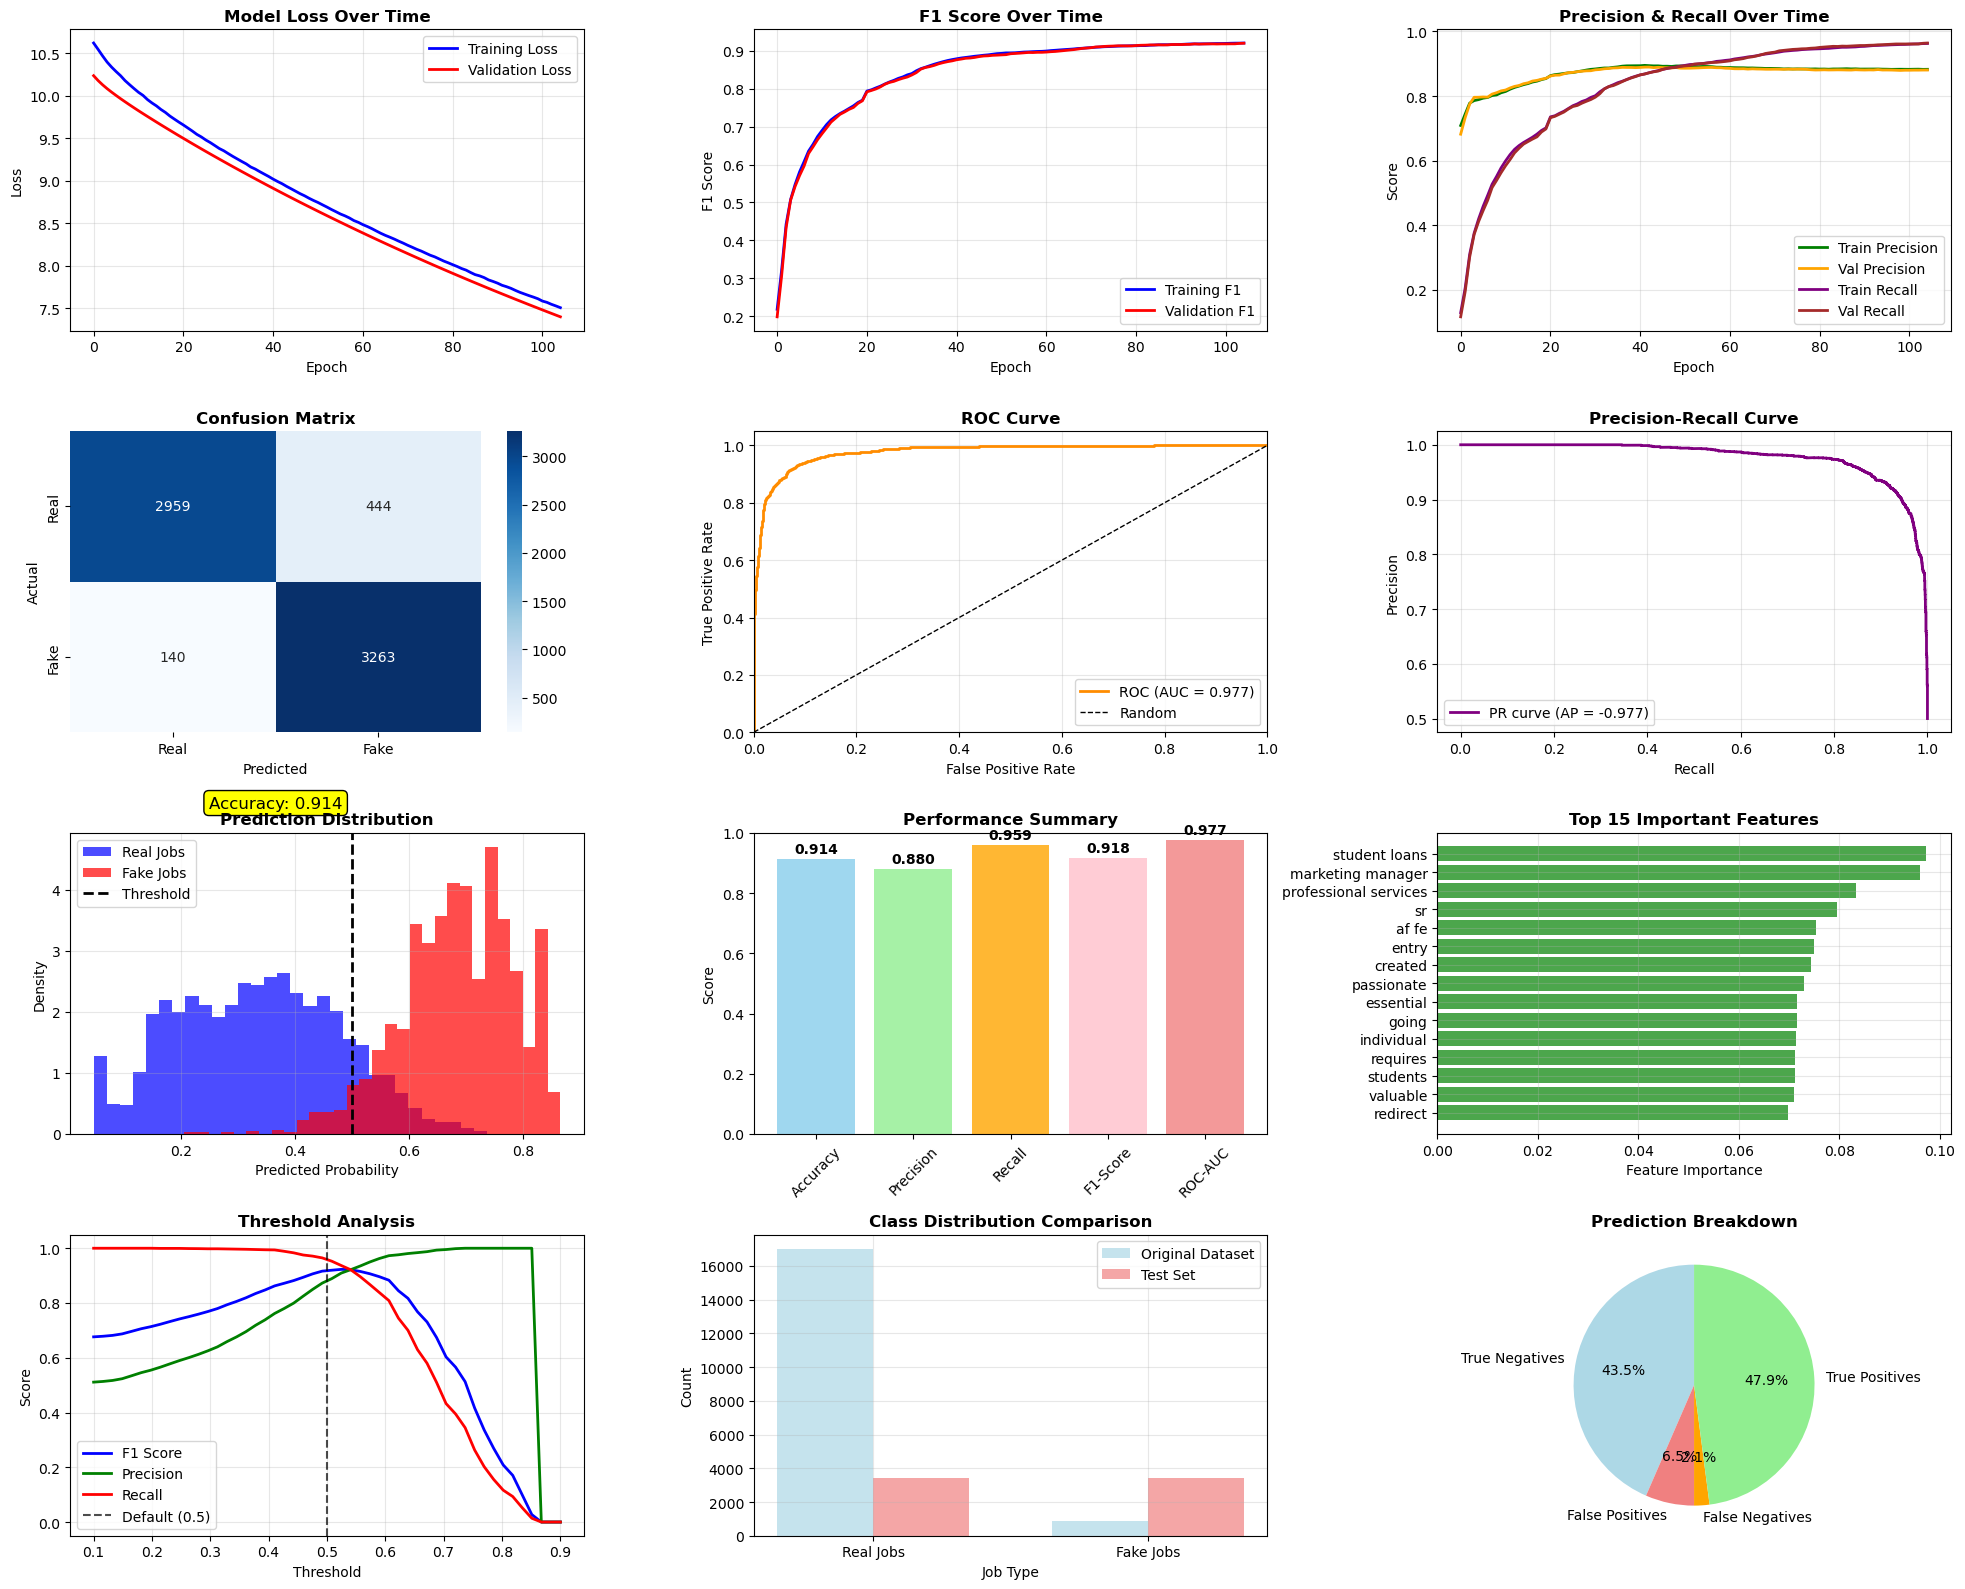


📊 DETAILED VISUALIZATION ANALYSIS:

🎯 Training Convergence:
   Final training loss: 7.5079
   Final validation loss: 7.4005
   Final training F1: 0.9210
   Final validation F1: 0.9204
⚠️  Potential overfitting detected:
   Loss difference: 0.1074
   F1 difference: 0.0006

🎯 Optimal Threshold Analysis:
   Optimal threshold: 0.524
   F1 score at optimal threshold: 0.9229
   F1 score at default (0.5): 0.9179

💼 Business Impact Summary:
   Fake jobs successfully blocked: 3,263
   Real jobs correctly approved: 2,959
   Real jobs incorrectly blocked: 444 (potential revenue loss)
   Fake jobs that slipped through: 140 (user safety risk)
   False positive rate: 0.130 (13.0% of real jobs blocked)
   False negative rate: 0.041 (4.1% of fake jobs missed)
✅ Complete: Comprehensive visualizations created!


In [62]:
if 'history' in locals() and 'test_metrics' in locals():
    print("🔄 Creating comprehensive visualizations...")
    
    def plot_comprehensive_results(history, y_test, y_test_pred, y_test_proba):
        """Create comprehensive visualization of results"""
        
        fig = plt.figure(figsize=(20, 16))
        plt.subplots_adjust(wspace=1.5, hspace=1.5) 
        
        # 1. Training History - Loss
        plt.subplot(4, 3, 1)
        plt.plot(history['train_losses'], label='Training Loss', linewidth=2, color='blue')
        plt.plot(history['val_losses'], label='Validation Loss', linewidth=2, color='red')
        plt.title('Model Loss Over Time', fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 2. Training History - F1 Score
        plt.subplot(4, 3, 2)
        plt.plot(history['train_f1'], label='Training F1', linewidth=2, color='blue')
        plt.plot(history['val_f1'], label='Validation F1', linewidth=2, color='red')
        plt.title('F1 Score Over Time', fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('F1 Score')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 3. Precision-Recall Over Time
        plt.subplot(4, 3, 3)
        plt.plot(history['train_precision'], label='Train Precision', linewidth=2, color='green')
        plt.plot(history['val_precision'], label='Val Precision', linewidth=2, color='orange')
        plt.plot(history['train_recall'], label='Train Recall', linewidth=2, color='purple')
        plt.plot(history['val_recall'], label='Val Recall', linewidth=2, color='brown')
        plt.title('Precision & Recall Over Time', fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 4. Confusion Matrix
        plt.subplot(4, 3, 4)
        cm = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Real', 'Fake'],
                    yticklabels=['Real', 'Fake'])
        plt.title('Confusion Matrix', fontweight='bold')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        
        # Add accuracy text on confusion matrix
        accuracy = accuracy_score(y_test, y_test_pred)
        plt.text(1, 2.5, f'Accuracy: {accuracy:.3f}', 
                ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))
        
        # 5. ROC Curve
        plt.subplot(4, 3, 5)
        fpr, tpr, _ = roc_curve(y_test, y_test_proba)
        roc_auc = roc_auc_score(y_test, y_test_proba)
        plt.plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {roc_auc:.3f})', color='darkorange')
        plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 6. Precision-Recall Curve
        plt.subplot(4, 3, 6)
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_test_proba)
        avg_precision = np.trapz(precision_vals, recall_vals)
        plt.plot(recall_vals, precision_vals, linewidth=2,
                label=f'PR curve (AP = {avg_precision:.3f})', color='purple')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 7. Prediction Distribution
        plt.subplot(4, 3, 7)
        real_probs = y_test_proba[y_test == 0]
        fake_probs = y_test_proba[y_test == 1]
        plt.hist(real_probs, bins=30, alpha=0.7, label='Real Jobs', density=True, color='blue')
        plt.hist(fake_probs, bins=30, alpha=0.7, label='Fake Jobs', density=True, color='red')
        plt.axvline(x=0.5, color='black', linestyle='--', label='Threshold', linewidth=2)
        plt.xlabel('Predicted Probability')
        plt.ylabel('Density')
        plt.title('Prediction Distribution', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 8. Performance Metrics Summary
        plt.subplot(4, 3, 8)
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
        values = [
            accuracy_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred),
            recall_score(y_test, y_test_pred),
            f1_score(y_test, y_test_pred),
            roc_auc_score(y_test, y_test_proba)
        ]
        
        colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral']
        bars = plt.bar(metrics, values, color=colors, alpha=0.8)
        plt.ylim(0, 1)
        plt.title('Performance Summary', fontweight='bold')
        plt.ylabel('Score')
        plt.xticks(rotation=45)
        
        # Add value labels on bars
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # 9. Feature Importance (Top 15)
        plt.subplot(4, 3, 9)
        if hasattr(preprocessor, 'tfidf_vectorizer'):
            feature_names = preprocessor.tfidf_vectorizer.get_feature_names_out()
            if len(feature_names) > 0:
                tfidf_weights = np.abs(nn.layers[0]['weight'][:len(feature_names), 0])
                top_indices = np.argsort(tfidf_weights)[-15:]
                top_features = [feature_names[i] for i in top_indices]
                top_weights = [tfidf_weights[i] for i in top_indices]
                
                plt.barh(range(len(top_features)), top_weights, color='green', alpha=0.7)
                plt.yticks(range(len(top_features)), top_features)
                plt.xlabel('Feature Importance')
                plt.title('Top 15 Important Features', fontweight='bold')
                plt.grid(True, alpha=0.3)
        
        # 10. Threshold Analysis
        plt.subplot(4, 3, 10)
        thresholds = np.linspace(0.1, 0.9, 50)
        f1_scores = []
        precisions = []
        recalls = []
        
        for threshold in thresholds:
            pred_thresh = (y_test_proba > threshold).astype(int)
            if len(np.unique(pred_thresh)) > 1:  # Avoid division by zero
                f1_scores.append(f1_score(y_test, pred_thresh))
                precisions.append(precision_score(y_test, pred_thresh))
                recalls.append(recall_score(y_test, pred_thresh))
            else:
                f1_scores.append(0)
                precisions.append(0)
                recalls.append(0)
        
        plt.plot(thresholds, f1_scores, label='F1 Score', linewidth=2, color='blue')
        plt.plot(thresholds, precisions, label='Precision', linewidth=2, color='green')
        plt.plot(thresholds, recalls, label='Recall', linewidth=2, color='red')
        plt.axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Default (0.5)')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title('Threshold Analysis', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 11. Class Distribution Comparison
        plt.subplot(4, 3, 11)
        original_dist = np.bincount(df['fraudulent'].values)
        final_dist = np.bincount(y_test)
        
        x = ['Real Jobs', 'Fake Jobs']
        width = 0.35
        x_pos = np.arange(len(x))
        
        plt.bar(x_pos - width/2, original_dist, width, label='Original Dataset', alpha=0.7, color='lightblue')
        plt.bar(x_pos + width/2, final_dist, width, label='Test Set', alpha=0.7, color='lightcoral')
        plt.xlabel('Job Type')
        plt.ylabel('Count')
        plt.title('Class Distribution Comparison', fontweight='bold')
        plt.xticks(x_pos, x)
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 12. Error Analysis Pie Chart
        plt.subplot(4, 3, 12)
        cm = confusion_matrix(y_test, y_test_pred)
        tn, fp, fn, tp = cm.ravel()
        
        errors = {
            'True Negatives': tn,
            'False Positives': fp,
            'False Negatives': fn,
            'True Positives': tp
        }
        
        colors = ['lightblue', 'lightcoral', 'orange', 'lightgreen']
        plt.pie(errors.values(), labels=errors.keys(), autopct='%1.1f%%', 
                colors=colors, startangle=90)
        plt.title('Prediction Breakdown', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    # Create comprehensive visualization
    plot_comprehensive_results(history, y_test, y_test_pred, y_test_proba)
    
    # Additional detailed analysis
    print("\n📊 DETAILED VISUALIZATION ANALYSIS:")
    print("=" * 60)
    
    # Training convergence analysis
    final_train_loss = history['train_losses'][-1]
    final_val_loss = history['val_losses'][-1]
    final_train_f1 = history['train_f1'][-1]
    final_val_f1 = history['val_f1'][-1]
    
    print(f"\n🎯 Training Convergence:")
    print(f"   Final training loss: {final_train_loss:.4f}")
    print(f"   Final validation loss: {final_val_loss:.4f}")
    print(f"   Final training F1: {final_train_f1:.4f}")
    print(f"   Final validation F1: {final_val_f1:.4f}")
    
    # Overfitting check
    loss_diff = final_train_loss - final_val_loss
    f1_diff = final_train_f1 - final_val_f1
    
    if abs(loss_diff) > 0.1 or f1_diff > 0.05:
        print(f"⚠️  Potential overfitting detected:")
        print(f"   Loss difference: {loss_diff:.4f}")
        print(f"   F1 difference: {f1_diff:.4f}")
    else:
        print(f"✅ Good generalization achieved")
    
    # Threshold recommendation
    thresholds = np.linspace(0.1, 0.9, 50)
    f1_scores = []
    for threshold in thresholds:
        pred_thresh = (y_test_proba > threshold).astype(int)
        if len(np.unique(pred_thresh)) > 1:
            f1_scores.append(f1_score(y_test, pred_thresh))
        else:
            f1_scores.append(0)
    
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    optimal_f1 = max(f1_scores)
    
    print(f"\n🎯 Optimal Threshold Analysis:")
    print(f"   Optimal threshold: {optimal_threshold:.3f}")
    print(f"   F1 score at optimal threshold: {optimal_f1:.4f}")
    print(f"   F1 score at default (0.5): {f1_score(y_test, y_test_pred):.4f}")
    
    # Business impact summary
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n💼 Business Impact Summary:")
    print(f"   Fake jobs successfully blocked: {tp:,}")
    print(f"   Real jobs correctly approved: {tn:,}")
    print(f"   Real jobs incorrectly blocked: {fp:,} (potential revenue loss)")
    print(f"   Fake jobs that slipped through: {fn:,} (user safety risk)")
    
    if fp > 0:
        fp_rate = fp / (tn + fp)
        print(f"   False positive rate: {fp_rate:.3f} ({fp_rate*100:.1f}% of real jobs blocked)")
    
    if fn > 0:
        fn_rate = fn / (tp + fn)
        print(f"   False negative rate: {fn_rate:.3f} ({fn_rate*100:.1f}% of fake jobs missed)")
    
    print("✅ Complete: Comprehensive visualizations created!")

else:
    print("❌ Visualization requires training history and test metrics.")
    print("💡 Please ensure previous steps have been completed successfully.")


# TO SAVE THE MODEL TO MY PROJECT FOLDER FOR DEPLOYMENT 

In [65]:
import pickle 
import os

# model directory
model_dir=r'E:\fakejobpostingNNdeployment\models'

with open(os.path.join(model_dir,'neural_network.pkl'), 'wb') as f:
    pickle.dump(nn, f)

with open (os.path.join(model_dir,'preprocessor.pkl'), 'wb') as f:
    pickle.dump(preprocessor, f)

print("✅ Model and preprocessor saved successfully!")
print("📁 Files saved:")
print(f"   - {os.path.join(model_dir, 'neural_network.pkl')}")
print(f"   - {os.path.join(model_dir, 'preprocessor.pkl')}")

✅ Model and preprocessor saved successfully!
📁 Files saved:
   - E:\fakejobpostingNNdeployment\models\neural_network.pkl
   - E:\fakejobpostingNNdeployment\models\preprocessor.pkl
